In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

from spatial_distribution_utilities.metrics import radial_disribution, structure_factor_from_g_r_cich, structure_factor_from_g_r_fft, psi_k
from spatial_distribution_utilities.spheres.api import simulate_spheres

In [2]:
# plt.style.use("dark_background")

In [3]:
def plot_points(points,
                # points_analyzed=None,
                # points_inner=None,
                # analyzed_region_edge=None,
                # inner_region_edge=None
                ):
    fig, ax = plt.subplots()
    ax.scatter(points.x, points.y, s=2)
    # if points_analyzed:
    #     ax.scatter(points_analyzed.x, points_analyzed.y, s=2, color="red")
    # if points_inner:
    #     ax.scatter(points_inner.x, points_inner.y, s=2, color="orange")
    # if analyzed_region_edge:
    #     ax.plot(analyzed_region_edge[0], analyzed_region_edge[1], color="red")
    # if inner_region_edge:
    #     ax.plot(inner_region_edge[0], inner_region_edge[1], color="orange")
    ax.set_aspect('equal','box')
    fig.set_size_inches(10,10)
    plt.show()

# Hard Disks

##  Dense

In [4]:
hd1 = simulate_spheres(eventspercycle = 20,
                     N = 5000,
                     initalpf = 0.2,
                     maxpf = 0.8, #0.05,
                     temp = 0.2,
                     growthrate = 0.001,
                     maxpressure = 100.,
                     verbose=False)

Reading input from file /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/input
   eventspercycle : 20
   N : 5000
   initialpf : 0.2
   maxpf : 0.8
   temp : 0.2
   growthrate : 0.001
   maxpressure : 100
   readfile : new
   writefile : /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/write.dat
   datafile : /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/data.dat
ngrids = 70
DIM = 2
Creating new positions of spheres


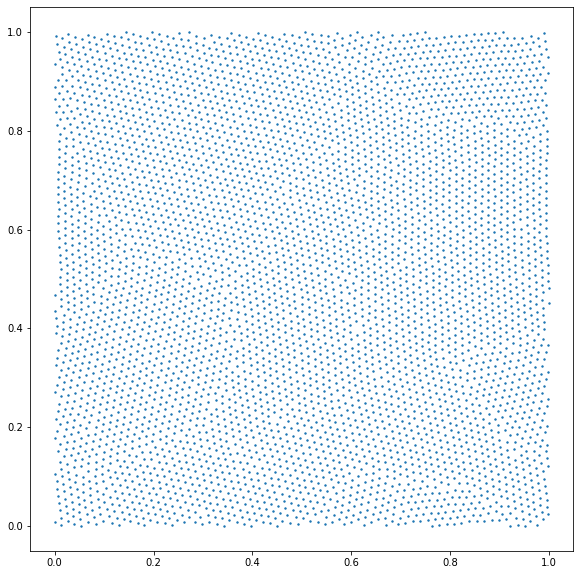

In [5]:
plot_points(hd1)

Log: Calculating distances


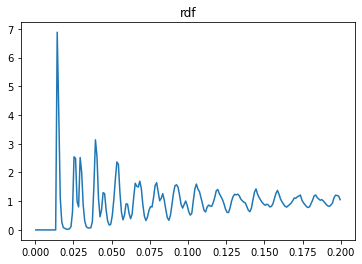

In [6]:
hd1_rdf = radial_disribution(hd1,
                   [[0,0],[0,1],[1,1],[1,0]],
                   0.2,
                   n_bins=200,
                   plot=True)

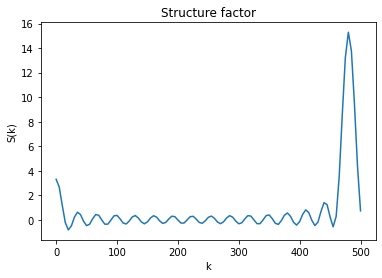

In [24]:
hd1_sf = structure_factor_from_g_r_fft(hd1_rdf["rd"], hd1_rdf["r"],hd1_rdf["density"])

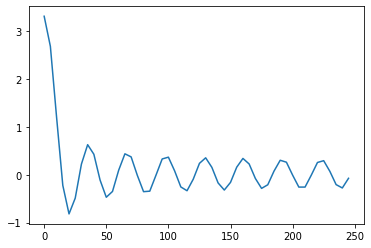

In [31]:
plt.plot(hd1_sf[0][:50],hd1_sf[1][:50])

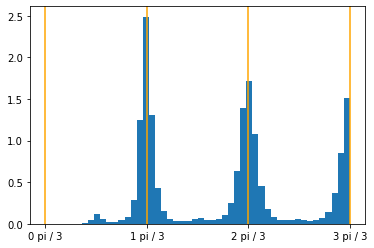

In [25]:
hd1_psi, hd1_thetas = psi_k(hd1[["x","y"]].to_numpy(), 6)
plt.hist(hd1_thetas, bins=50, density=True)
plt.xticks([i * np.pi / 3 for i in range(4)], [f"{i} pi / 3" for i in range(4)])
for i in range(4):
    plt.axvline(i * np.pi / 3, color="orange")

## Almost ordered

In [8]:
hd2 = simulate_spheres(eventspercycle = 20,
                     N = 5000,
                     initalpf = 0.2,
                     maxpf = 0.7, #0.05,
                     temp = 0.2,
                     growthrate = 0.001,
                     maxpressure = 100.,
                     verbose=False)

Reading input from file /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/input
   eventspercycle : 20
   N : 5000
   initialpf : 0.2
   maxpf : 0.7
   temp : 0.2
   growthrate : 0.001
   maxpressure : 100
   readfile : new
   writefile : /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/write.dat
   datafile : /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/data.dat
ngrids = 74
DIM = 2
Creating new positions of spheres


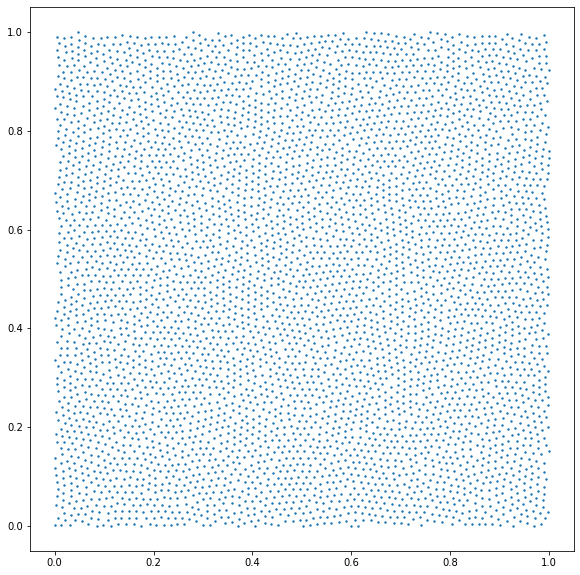

In [9]:
plot_points(hd2)

In [10]:
hd2_scaled = hd2 * 100

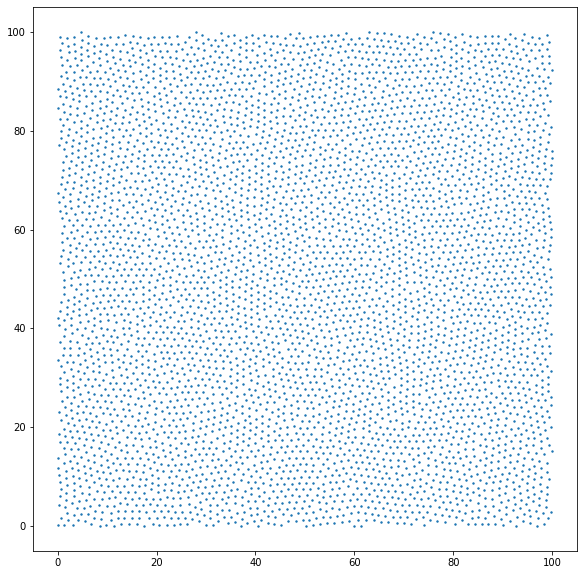

In [11]:
plot_points(hd2_scaled)

Log: Calculating distances


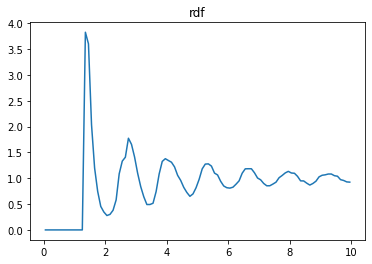

In [20]:
hd2_rdf = radial_disribution(hd2_scaled,
                   np.array([[0,0],[0,1],[1,1],[1,0]]) *100,
                   10,
                   n_bins=100,
                   plot=True)

# hd2_rdf = radial_disribution(hd2,
#                    np.array([[0,0],[0,1],[1,1],[1,0]]),
#                    0.1,
#                    n_bins=200,
#                    plot=True)

#### Structure factor test

In [21]:
hd2_rdf.keys()

dict_keys(['r', 'rd', 'bin_edges', 'raw_bins', 'N_inner', 'N_analyzed', 'density'])

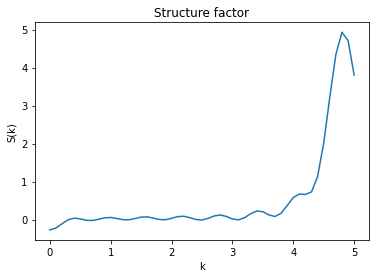

In [22]:
k_vals, s_vals = structure_factor_from_g_r_fft(hd2_rdf["rd"], hd2_rdf["r"], hd2_rdf["density"])

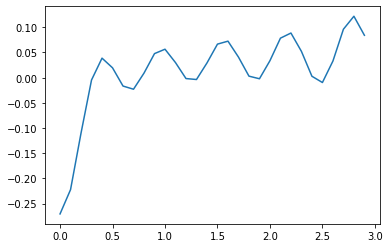

In [23]:
plt.plot(k_vals[:30], s_vals[:30])

In [15]:
from scipy.signal import find_peaks

In [17]:
peaks, _ = find_peaks(s_vals)

In [18]:
freq_maxima = k_vals[peaks]

In [19]:
1 / freq_maxima

array([2.5       , 1.        , 0.625     , 0.45454545])

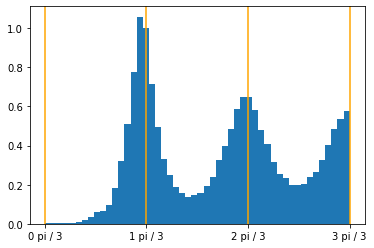

In [13]:
hd2_psik = psi_k(hd2[["x","y"]].to_numpy(), 6)
plt.hist(hd2_psik[1], bins=50, density=True)
plt.xticks([i * np.pi / 3 for i in range(4)], [f"{i} pi / 3" for i in range(4)])
for i in range(4):
    plt.axvline(i * np.pi / 3, color="orange")

## Somewhat ordered

In [32]:
hd3 = simulate_spheres(eventspercycle = 20,
                     N = 5000,
                     initalpf = 0.2,
                     maxpf = 0.5, #0.05,
                     temp = 0.2,
                     growthrate = 0.001,
                     maxpressure = 100.,
                     verbose=False)

Reading input from file /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/input
   eventspercycle : 20
   N : 5000
   initialpf : 0.2
   maxpf : 0.5
   temp : 0.2
   growthrate : 0.001
   maxpressure : 100
   readfile : new
   writefile : /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/write.dat
   datafile : /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/data.dat
ngrids = 88
DIM = 2
Creating new positions of spheres


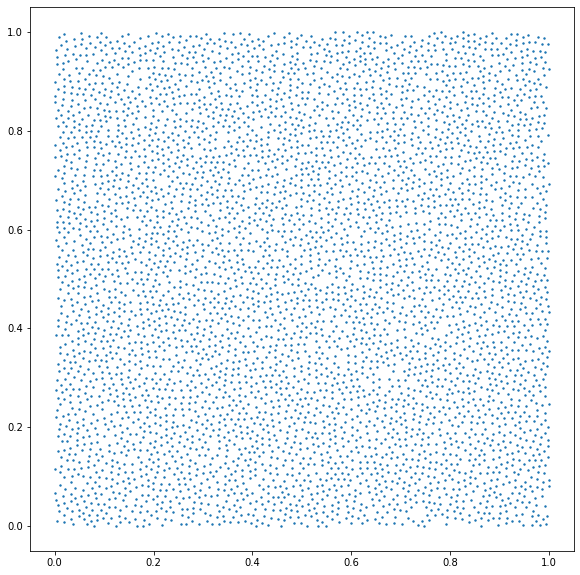

In [33]:
plot_points(hd3)

Log: Calculating distances


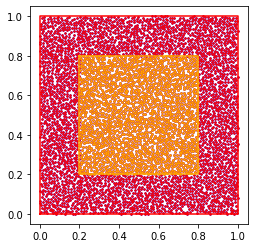

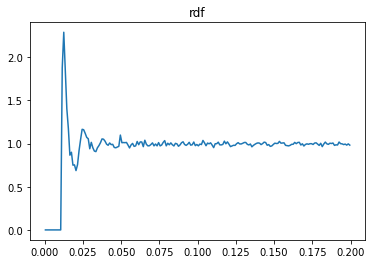

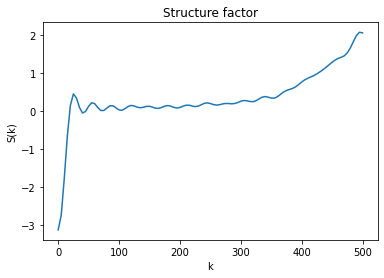

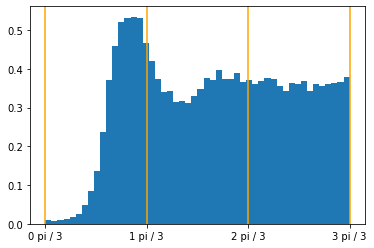

In [35]:
hd3_rdf = radial_disribution(hd3,
                   [[0,0],[0,1],[1,1],[1,0]],
                   0.2,
                   n_bins=200,
                   plot_points=True)

hd3_sf = structure_factor_from_g_r_fft(hd3_rdf["rd"], hd3_rdf["r"], hd3_rdf["density"])

hd3_psik = psi_k(hd3[["x","y"]].to_numpy(), 6)
plt.hist(hd3_psik[1], bins=50, density=True)
plt.xticks([i * np.pi / 3 for i in range(4)], [f"{i} pi / 3" for i in range(4)])
for i in range(4):
    plt.axvline(i * np.pi / 3, color="orange")

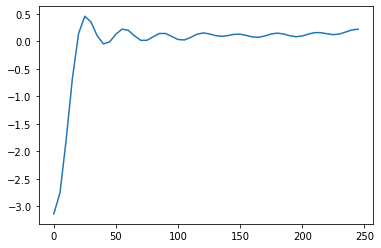

In [36]:
plt.plot(hd3_sf[0][:50],hd3_sf[1][:50])

#### More points

In [55]:
hd3 = simulate_spheres(eventspercycle = 20,
                     N = 20_000,
                     initalpf = 0.2,
                     maxpf = 0.5, #0.05,
                     temp = 0.2,
                     growthrate = 0.001,
                     maxpressure = 100.,
                     verbose=False)

Reading input from file /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/input
   eventspercycle : 20
   N : 20000
   initialpf : 0.2
   maxpf : 0.5
   temp : 0.2
   growthrate : 0.001
   maxpressure : 100
   readfile : new
   writefile : /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/write.dat
   datafile : /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/data.dat
ngrids = 177
DIM = 2
Creating new positions of spheres
error, 18746 and 1689 are overlapping at time 0.00883049 and A, B, C = 5.08067  -0.0126735  -1.73216e-08
velocity i=  (-1.76319, 0.220204), velocity j= (0.476009, -0.0379774), gtime= 0.00883049, det= 0.000160705


Exception: Something went wrong

In [ ]:
hdm_rdf = radial_disribution(hd3,
                   [[0,0],[0,1],[1,1],[1,0]],
                   0.2,
                   n_bins=200,
                   plot_points=True)

hd3_sf = structure_factor_from_g_r_fft(hd3_rdf["rd"], hd3_rdf["r"], hd3_rdf["density"])

hd3_psik = psi_k(hd3[["x","y"]].to_numpy(), 6)
plt.hist(hd3_psik[1], bins=50, density=True)
plt.xticks([i * np.pi / 3 for i in range(4)], [f"{i} pi / 3" for i in range(4)])
for i in range(4):
    plt.axvline(i * np.pi / 3, color="orange")

In [38]:
hd3_1 = simulate_spheres(eventspercycle = 20,
                     N = 5000,
                     initalpf = 0.2,
                     maxpf = 0.3, #0.05,
                     temp = 0.1,
                     growthrate = 0.001,
                     maxpressure = 100.,
                     verbose=False)

Reading input from file /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/input
   eventspercycle : 20
   N : 5000
   initialpf : 0.2
   maxpf : 0.3
   temp : 0.1
   growthrate : 0.001
   maxpressure : 100
   readfile : new
   writefile : /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/write.dat
   datafile : /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/data.dat
ngrids = 114
DIM = 2
Creating new positions of spheres


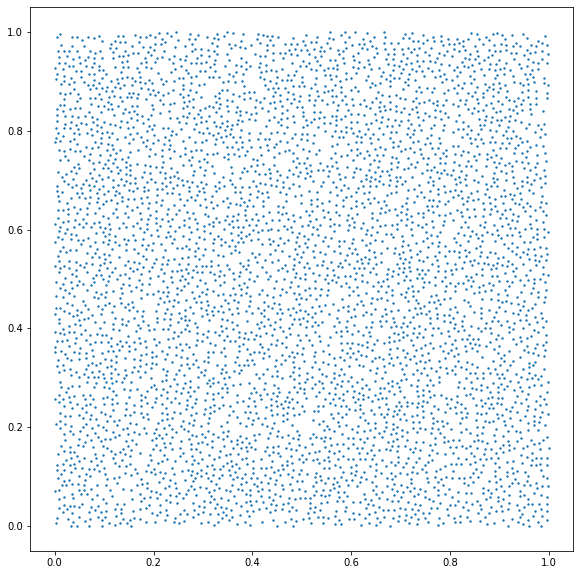

In [39]:
plot_points(hd3_1)

Log: Calculating distances


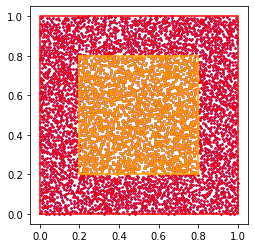

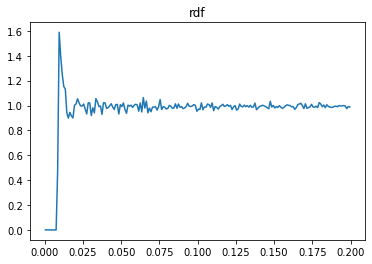

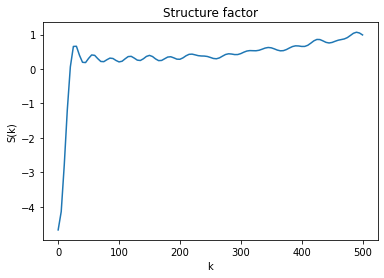

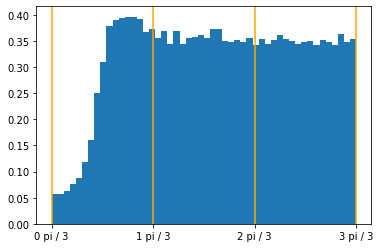

In [41]:
hd3_1_rdf = radial_disribution(hd3_1,
                   [[0,0],[0,1],[1,1],[1,0]],
                   0.2,
                   n_bins=200,
                   plot_points=True)

hd3_1_sf = structure_factor_from_g_r_fft(hd3_1_rdf["rd"], hd3_1_rdf["r"], hd3_1_rdf["density"])

hd3_1_psik = psi_k(hd3_1[["x","y"]].to_numpy(), 6)
plt.hist(hd3_1_psik[1], bins=50, density=True)
plt.xticks([i * np.pi / 3 for i in range(4)], [f"{i} pi / 3" for i in range(4)])
for i in range(4):
    plt.axvline(i * np.pi / 3, color="orange")

## Unordered

In [43]:
hd4 = simulate_spheres(eventspercycle = 20,
                     N = 5000,
                     initalpf = 0.005,
                     maxpf = 0.01, #0.05,
                     temp = 0.2,
                     growthrate = 0.001,
                     maxpressure = 100.,
                     verbose=False)

Reading input from file /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/input
   eventspercycle : 20
   N : 5000
   initialpf : 0.005
   maxpf : 0.01
   temp : 0.2
   growthrate : 0.001
   maxpressure : 100
   readfile : new
   writefile : /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/write.dat
   datafile : /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/data.dat
ngrids = 626
DIM = 2
Creating new positions of spheres


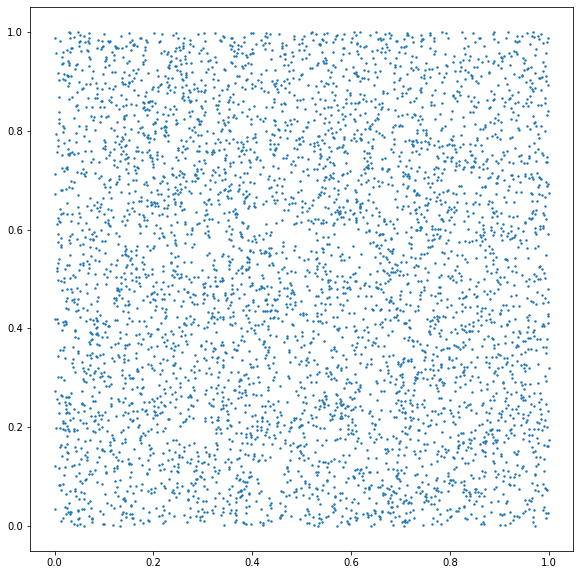

In [44]:
plot_points(hd4)

Log: Calculating distances


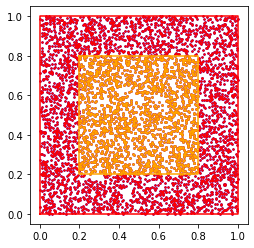

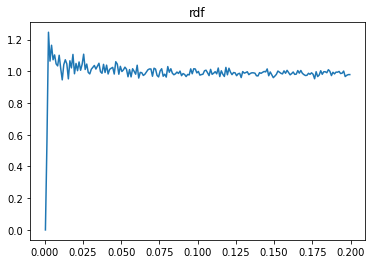

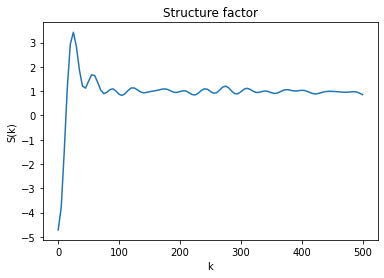

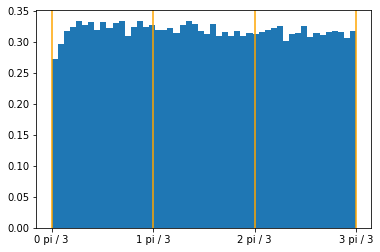

In [45]:
hd4_rdf = radial_disribution(hd4,
                   [[0,0],[0,1],[1,1],[1,0]],
                   0.2,
                   n_bins=200,
                   plot_points=True)

hd4_sf = structure_factor_from_g_r_fft(hd4_rdf["rd"], hd4_rdf["r"], hd4_rdf["density"])

hd4_psik = psi_k(hd4[["x","y"]].to_numpy(), 6)
plt.hist(hd4_psik[1], bins=50, density=True)
plt.xticks([i * np.pi / 3 for i in range(4)], [f"{i} pi / 3" for i in range(4)])
for i in range(4):
    plt.axvline(i * np.pi / 3, color="orange")

#  Crystal

# Dolines

In [46]:
from lidar_data_analyzer import LidarDataSet

In [47]:
data_segment_filenames = [[f"TM1_{x}_{y}" for y in range(80,84+1)] for x in range(442,447+1)]

selected_range_points = [[1200, 4040],
                         [1586, 3777],
                         [2500, 3440],
                         [2852, 3100],
                         [3290, 2973],
                         [3790, 2382],
                         [3793, 2091],
                         [4470, 1700],
                         [6000, 270],
                         [6000, 0],
                         [4025, 0],
                         [2340, 1646],
                         [2280, 1930],
                         [1492, 2500],
                         [1193, 3120],
                         [465, 3700],
                         [310, 4385],
                         [380, 4600],
                         [619,4700],
                         [1070,4316]]

ldsl = LidarDataSet.from_array_of_csv_files(data_segment_filenames,
                                            filename_prefix="./data/dataset2/",
                                            selected_range_points=selected_range_points)
ldsl.find_sinkholes()

LOG: find_sinkholes: found 6791 sinkholes


In [48]:
ldsl.sinkholes

,center_x,center_y,center,analyzed,analyzed_nonborder,inner
0,436,765,"(436, 765)",False,False,False
1,2026,2722,"(2026, 2722)",True,True,True
2,15,1442,"(15, 1442)",False,False,False
3,485,697,"(485, 697)",False,False,False
4,472,716,"(472, 716)",False,False,False
...,...,...,...,...,...,...
6786,5550,4851,"(5550, 4851)",False,False,False
6787,5625,4985,"(5625, 4985)",False,False,False
6788,5851,2470,"(5851, 2470)",False,False,False
6789,5499,4944,"(5499, 4944)",False,False,False


In [49]:
dol_pos = pd.DataFrame({"x": ldsl.sinkholes["center_x"], "y": ldsl.sinkholes["center_y"]})
dol_pos

,x,y
0,436,765
1,2026,2722
2,15,1442
3,485,697
4,472,716
...,...,...
6786,5550,4851
6787,5625,4985
6788,5851,2470
6789,5499,4944


Log: Calculating distances


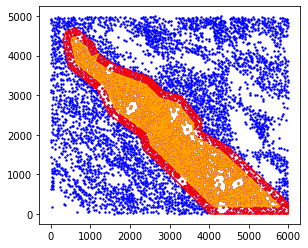

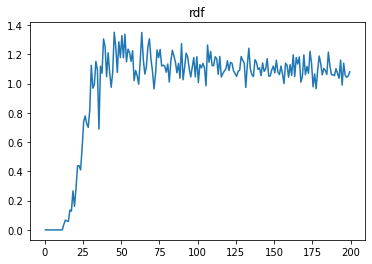

In [50]:
dol_rdf = radial_disribution(dol_pos,
                             selected_range_points,
                             200,
                             n_bins=200,
                             plot_points=True)

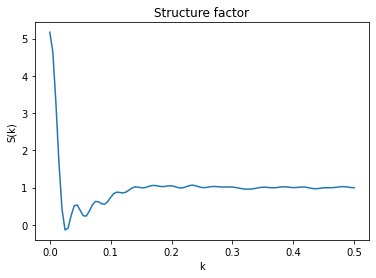

In [51]:
dol_sf = structure_factor_from_g_r_fft(dol_rdf["rd"], dol_rdf["r"], dol_rdf["density"])

/home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/metrics.py:260: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(np.dot(vecs[i,ni], vecs[i,nj])/(vec_norm(vecs[i,ni]) * vec_norm(vecs[i,nj])))


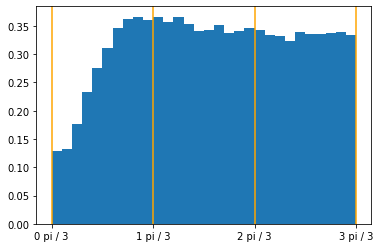

In [52]:
dol_psik = psi_k(dol_pos[["x","y"]].to_numpy(), 6)
plt.hist(dol_psik[1], bins=30, density=True)
plt.xticks([i * np.pi / 3 for i in range(4)], [f"{i} pi / 3" for i in range(4)])
for i in range(4):
    plt.axvline(i * np.pi / 3, color="orange")

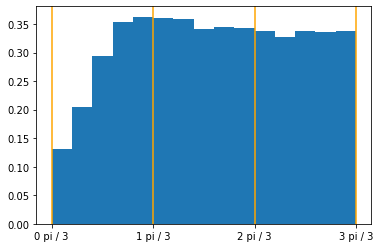

In [53]:
plt.hist(dol_psik[1], bins=15, density=True)
plt.xticks([i * np.pi / 3 for i in range(4)], [f"{i} pi / 3" for i in range(4)])
for i in range(4):
    plt.axvline(i * np.pi / 3, color="orange")

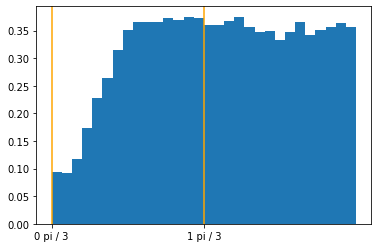

In [54]:
dol_psik2 = psi_k(dol_pos[["x","y"]].to_numpy(), 4)
plt.hist(dol_psik2[1], bins=30, density=True)
plt.xticks([i * np.pi / 2 for i in range(2)], [f"{i} pi / 3" for i in range(2)])
for i in range(2):
    plt.axvline(i * np.pi / 2, color="orange")